# Argument the image to solve overfitting
run 'cnn_origin.ipynb' to make subdirectory and split data


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
source_path = './data/cats-and-dogs/PetImages/'
source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')
root_dir = './data'
training_path = os.path.join(root_dir, "training")
test_path = os.path.join(root_dir, "validation")
training_path_cats = os.path.join(training_path, "cats")
training_path_dogs = os.path.join(training_path, "dogs")
test_path_cats = os.path.join(test_path, "cats")
test_path_dogs = os.path.join(test_path, "dogs")

From the previous model, the plot shows that the model is overfitting (validation acc is much lower then training acc), the following added parameter will reduce this situation (notice that different overfiting situation has different technique to utilize)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(directory=training_path,
                              batch_size=100,
                              class_mode='binary',
                              target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(directory=test_path,
                              batch_size=100,
                              class_mode='binary',
                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


set the same model to see the difference:

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=25,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/25
225/225 [==============================] - 111s 490ms/step - loss: 0.6739 - accuracy: 0.6079 - val_loss: 0.5464 - val_accuracy: 0.7208
Epoch 2/25
225/225 [==============================] - 111s 493ms/step - loss: 0.6003 - accuracy: 0.6716 - val_loss: 0.5234 - val_accuracy: 0.7372
Epoch 3/25
225/225 [==============================] - 112s 498ms/step - loss: 0.5708 - accuracy: 0.7018 - val_loss: 0.5060 - val_accuracy: 0.7568
Epoch 4/25
225/225 [==============================] - 113s 504ms/step - loss: 0.5466 - accuracy: 0.7209 - val_loss: 0.4556 - val_accuracy: 0.7932
Epoch 5/25
225/225 [==============================] - 115s 510ms/step - loss: 0.5313 - accuracy: 0.7370 - val_loss: 0.4744 - val_accuracy: 0.7636
Epoch 6/25
225/225 [==============================] - 114s 508ms/step - loss: 0.5189 - accuracy: 0.7428 - val_loss: 0.4339 - val_accuracy: 0.7956
Epoch 7/25
225/225 [==============================] - 114s 506ms/step - loss: 0.5059 - accuracy: 0.7510 - val_loss: 0.4205 -

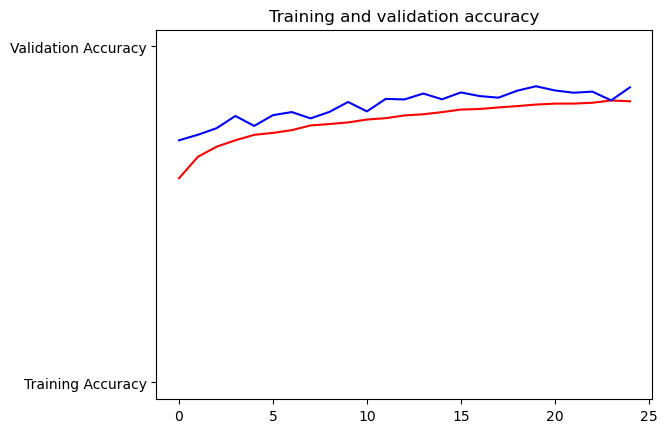

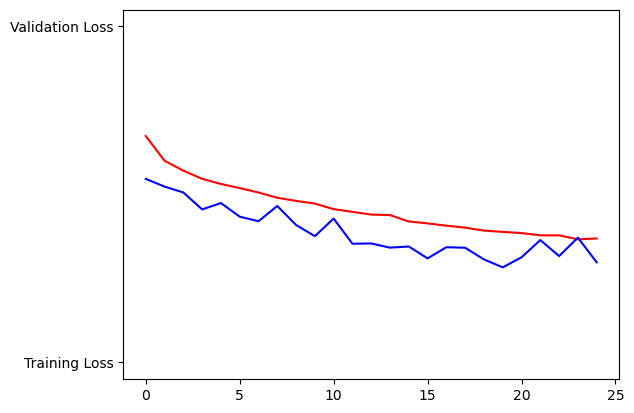

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()


The validation acc is close to the training acc, but the accuracy still surrounds with 80%, this due to training scale, iteration times, and also some engineering. Next, we will focus on transferring learning

In [10]:
model.save_weights('./checkpoints/cnn_argument_data')